In [1]:
import numpy as np
import pints
import pints.plot
import pints_smol_moments_7_normalised_jit as toy
import matplotlib.pyplot as plt
from scipy.stats import moment
import pandas as pd



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [2]:

model = toy.SmolModel(None,None)


true_parameters = [0.0003, 900]


times = np.linspace(20, 97, 78)

df = pd.read_csv('s11_inference_input_multi_well_t_20.csv', header=None)
org_values = np.transpose(df.to_numpy())


# 1st moment is mean, 1st centred moment should be array 6
centred_moment_1 = moment(org_values, moment=1, axis=1)
centred_moment_2 = moment(org_values, moment=2, axis=1)
centred_moment_3 = moment(org_values, moment=3, axis=1)
centred_moment_4 = moment(org_values, moment=4, axis=1)
centred_moment_5 = moment(org_values, moment=5, axis=1)
centred_moment_6 = moment(org_values, moment=6, axis=1)
centred_moment_7 = moment(org_values, moment=7, axis=1)

# Out array, mean, variance then centred standardised moments (aka skewness, kurtosis, hyperskewness)
st_dev = np.sqrt(centred_moment_2)
out_array = np.zeros((78,7))
out_array[:,0] = np.mean(org_values,axis=1)
out_array[:,1] = centred_moment_2
out_array[:,2] = np.divide(centred_moment_3,st_dev*st_dev*st_dev)
out_array[:,3] = np.divide(centred_moment_4,st_dev*st_dev*st_dev*st_dev)
out_array[:,4] = np.divide(centred_moment_5,st_dev*st_dev*st_dev*st_dev*st_dev)
out_array[:,5] = np.divide(centred_moment_6,st_dev*st_dev*st_dev*st_dev*st_dev*st_dev)
out_array[:,6] = np.divide(centred_moment_7,st_dev*st_dev*st_dev*st_dev*st_dev*st_dev*st_dev)

# print(st_dev)

# print(np.mean(org_values, axis=1))
# print(centred_moment_3)




Add noise to the data (using random sampling from normal distribution)

In [3]:

# noise = 9
# values = org_values + np.random.normal(0, noise, org_values.shape)

size_noise = 7
noise_value = 1
# # Create a list with the specified size filled with a placeholder value
noise_arr = [noise_value for _ in range(size_noise)]
# noise_arr[0] = 1
# noise_arr[1] = 1
# noise_arr[2] = 1
# noise_arr[3] = 1
# noise_arr[4] = 1


Set-up pints problem and log likelihoods

In [4]:

# problem = pints.MultiOutputProblem(model, times, centred_moments)
problem = pints.MultiOutputProblem(model, times, out_array)

log_likelihood = pints.GaussianLogLikelihood(problem)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)

print('Original problem dimension: ' + str(problem.n_parameters()))
print('New dimension: ' + str(log_likelihood.n_parameters()))
# print('New dimension: ' + str(log_likelihood_2.n_parameters()))

true_parameters += noise_arr
# print(true_parameters)



Original problem dimension: 2
New dimension: 9


Create uniform log prior

In [5]:

# Define the size of the list
size = 9
placeholder_lower_value = 0
placeholder_upper_value = 1000
 
# Create a list with the specified size filled with a placeholder value
prior_arr_lower = [placeholder_lower_value for _ in range(size)]
prior_arr_upper = [placeholder_upper_value for _ in range(size)]
prior_arr_lower[0] = 0.00001
prior_arr_upper[0] = 0.001
prior_arr_lower[1] = 1
prior_arr_upper[1] = 4000
prior_arr_lower[2] = 0
prior_arr_upper[2] = 100
prior_arr_lower[3] = 0
prior_arr_upper[3] = 100
prior_arr_lower[4] = 0
prior_arr_upper[4] = 100
prior_arr_lower[5] = 0
prior_arr_upper[5] = 100
prior_arr_lower[6] = 0
prior_arr_upper[6] = 100
prior_arr_lower[7] = 0
prior_arr_upper[7] = 100
prior_arr_lower[8] = 0
prior_arr_upper[8] = 100


# log_prior = pints.UniformLogPrior(
#     [0.000001, 1, 1],
#     [0.01, 10000, 100]
#     )
log_prior = pints.UniformLogPrior(
    prior_arr_lower,
    prior_arr_upper
    )

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_58259/1540627907.py:33: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


In [6]:

xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 10000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)



Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.4
1     705     0:02.4
2     1362    0:04.3
3     2034    0:06.3
20    11802   0:35.5
40    20961   1:03.4
60    29565   1:30.0
80    38277   1:56.9
100   46866   2:23.2
120   55374   2:49.4
140   63879   3:16.0
160   72195   3:41.7
180   81186   4:09.4
200   89706   4:35.4
220   98253   5:02.0
240   106824   5:28.3
260   115512   5:55.1
280   124188   6:22.2
300   133203   6:50.4
320   141993   7:17.6
340   150627   7:44.2
360   159504   8:11.7
380   168057   8:38.1
400   177585   9:07.3
420   185994   9:33.2
440   194469   9:59.5
460   202659  10:25.1
480   210675  10:49.8
500   218940  11:15.7
520   227178  11:41.0
540   235350  12:06.2
560   243600  12:32.3
580   251712  12:57.3
600   259884  13:22.8
620   267564  13:46.5
640   275271  14:10.5
660   283437  14:35.9
680   291759  15:01.8
700   300207  15:27.9
720   308199  15:54.4
740   316176  16:23.9
760   32442

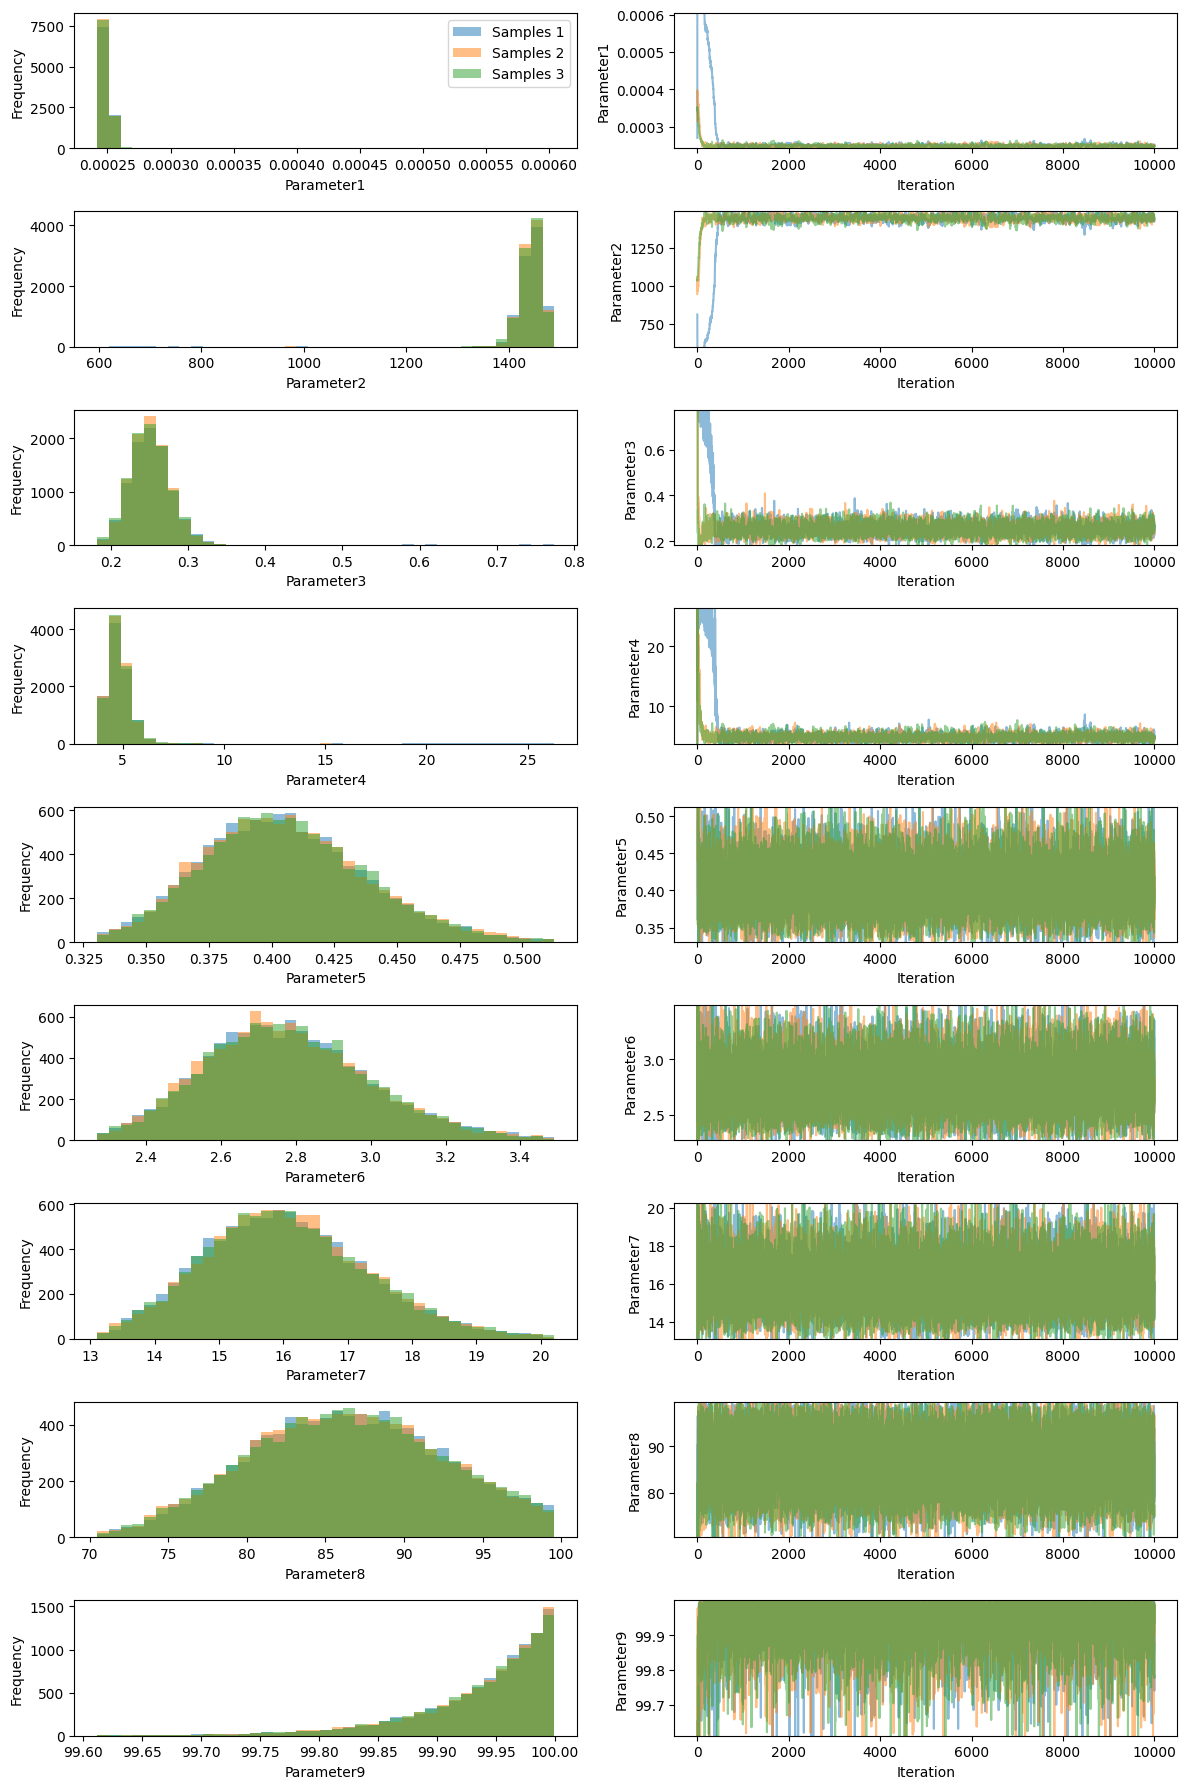

In [7]:

pints.plot.trace(chains, n_percentiles=99)
plt.savefig("mcmc.png")
plt.show()


In [17]:

# ITERS = 100
AllChains = chains[0,1000:10000,:]
# np.asarray(AllChains)
print(np.shape(AllChains))
print(AllChains[0])
print(AllChains)


(9000, 9)
[2.47558610e-04 1.44417753e+03 2.37583278e-01 4.10675170e+00
 4.39650075e-01 2.69960290e+00 1.62298992e+01 8.38895786e+01
 9.99412589e+01]
[[2.47558610e-04 1.44417753e+03 2.37583278e-01 ... 1.62298992e+01
  8.38895786e+01 9.99412589e+01]
 [2.48117163e-04 1.45284592e+03 2.55311760e-01 ... 1.52031830e+01
  8.50247292e+01 9.99469768e+01]
 [2.47075951e-04 1.45045870e+03 2.61398105e-01 ... 1.65754511e+01
  7.96313411e+01 9.99634927e+01]
 ...
 [2.49600178e-04 1.43577529e+03 2.71981098e-01 ... 1.41999961e+01
  7.81084181e+01 9.99872348e+01]
 [2.49788155e-04 1.44016962e+03 2.66534403e-01 ... 1.58683882e+01
  8.49207210e+01 9.97404751e+01]
 [2.48867724e-04 1.44521897e+03 2.53017844e-01 ... 1.61250558e+01
  9.07520381e+01 9.97837459e+01]]


In [18]:

for I in range(3-1):
    AllChains_add = chains[I+1,1000:10000,:]
    AllChains = np.concatenate((AllChains,AllChains_add), axis=0)


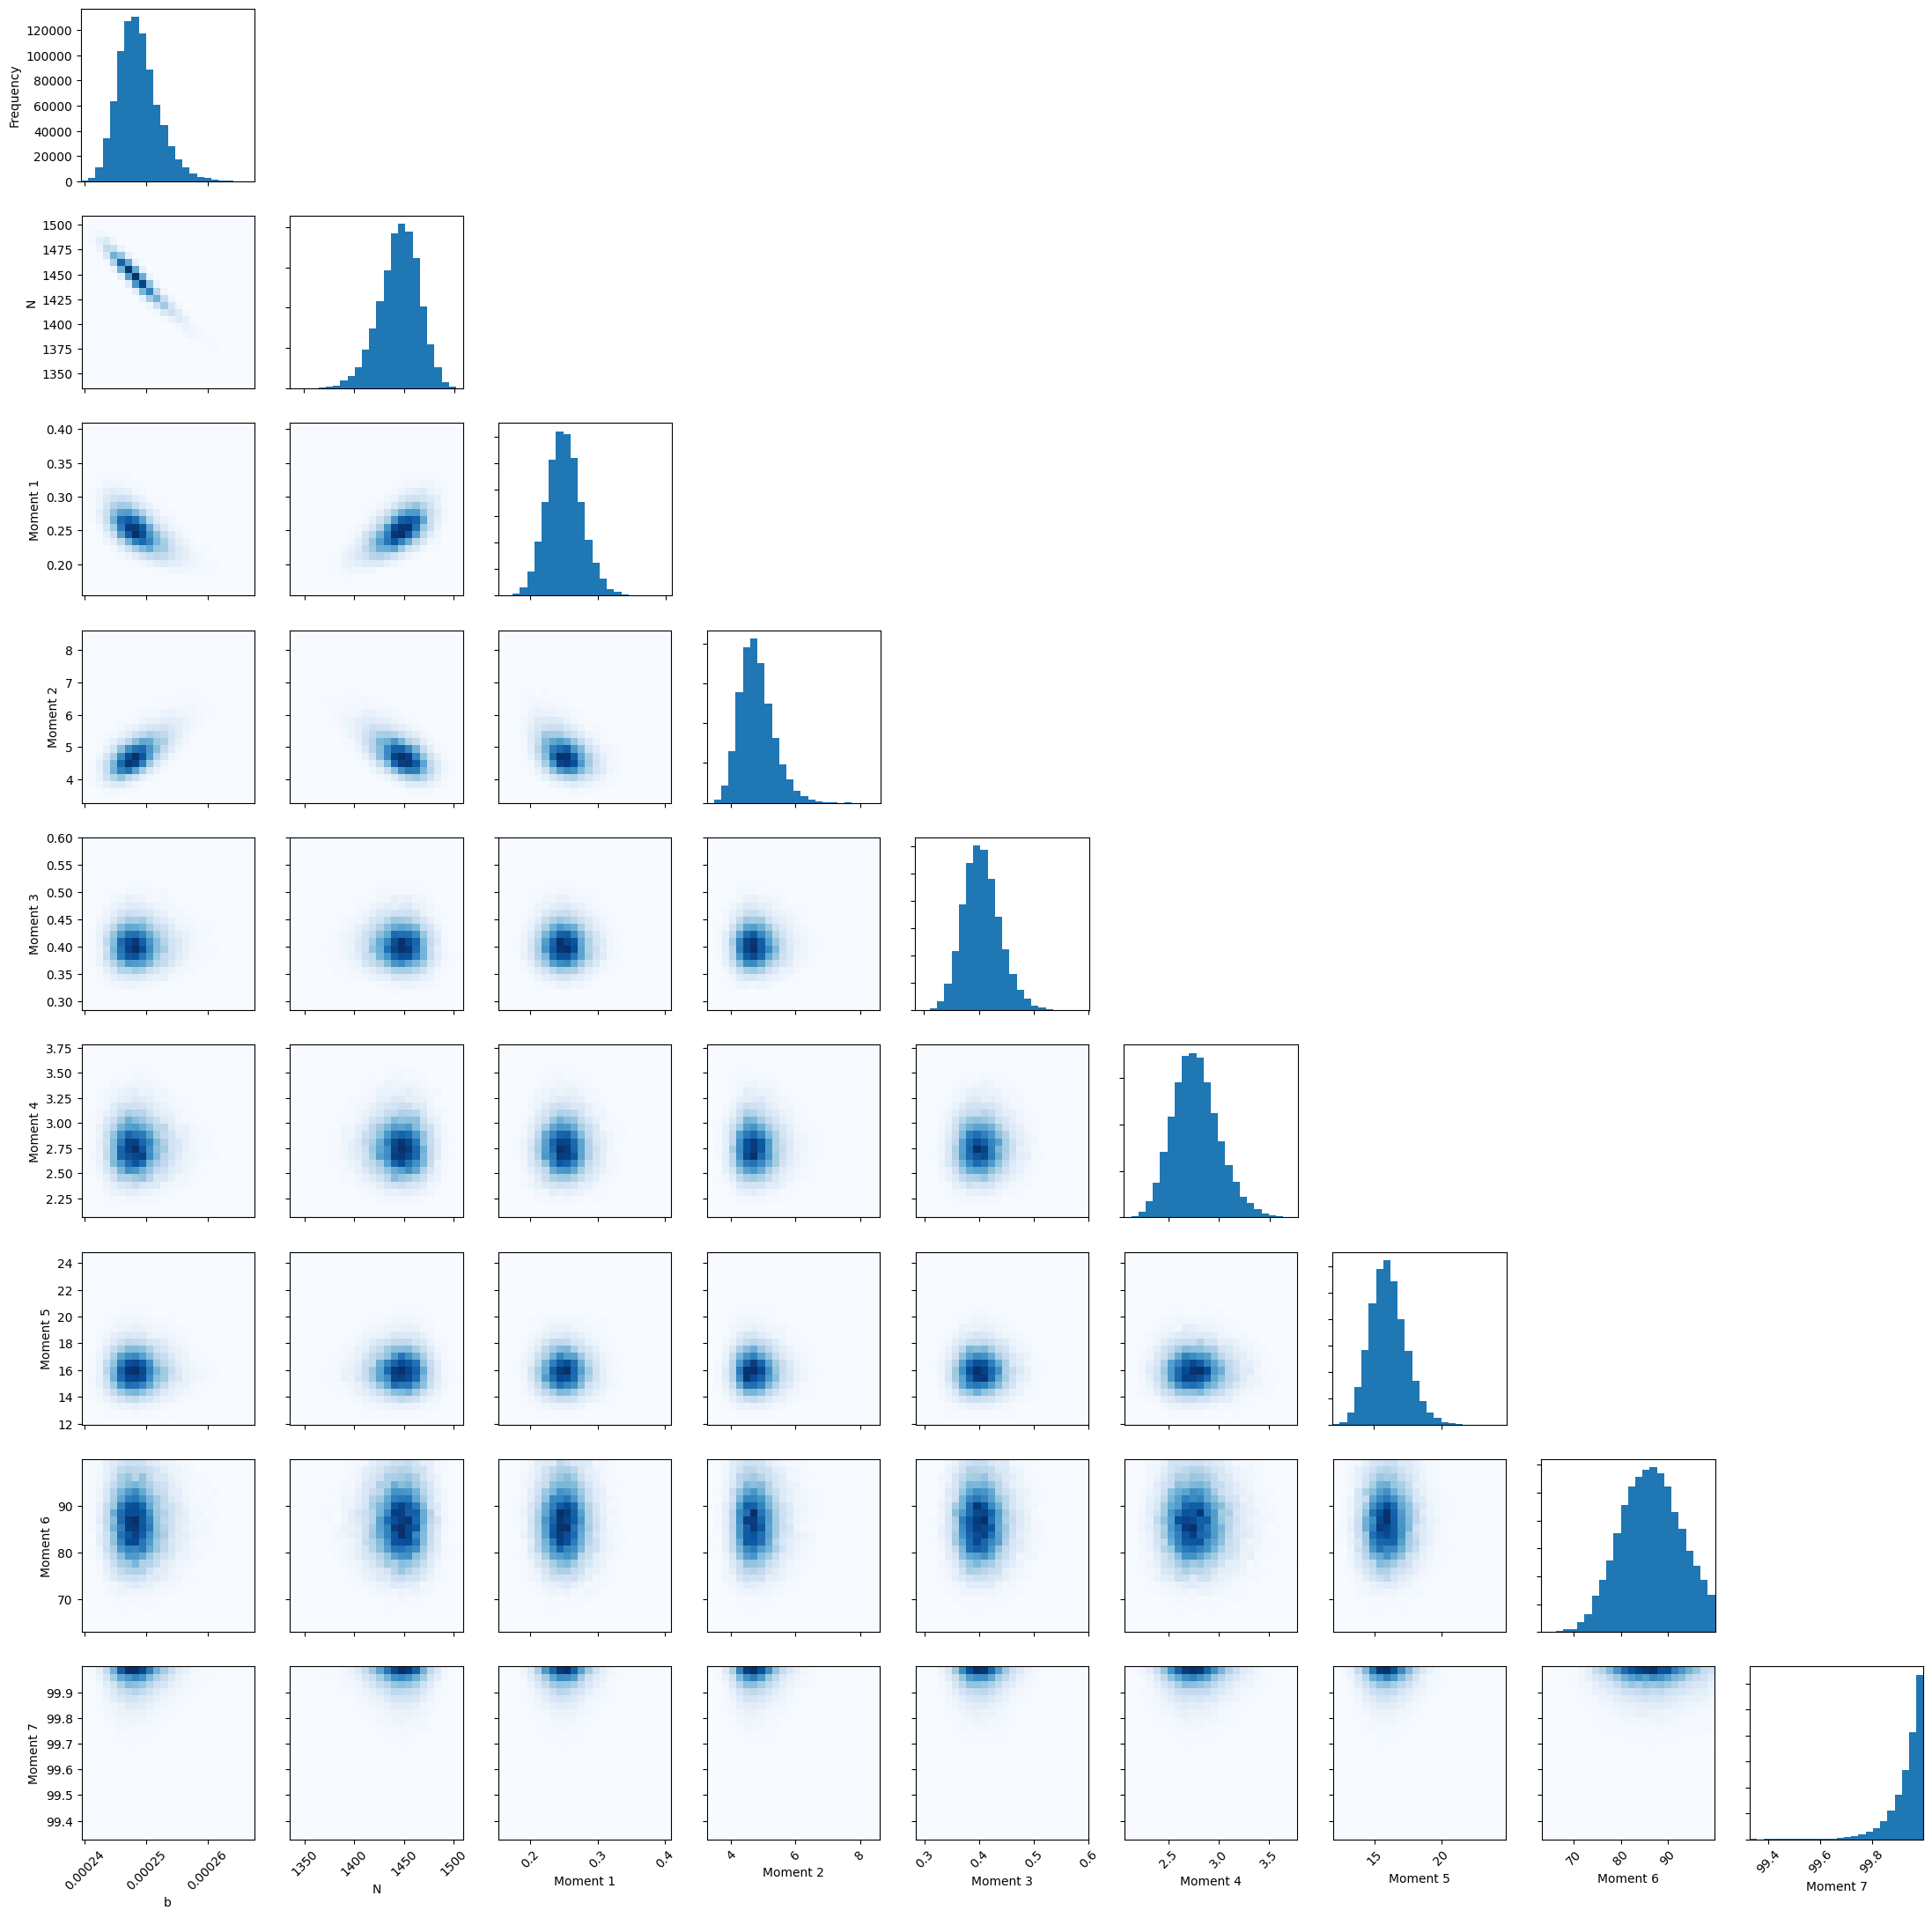

In [19]:


parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5", "Moment 6", "Moment 7"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)

pints.plot.pairwise(AllChains, heatmap=True, 
                    parameter_names=["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5", "Moment 6", "Moment 7"])
plt.show()

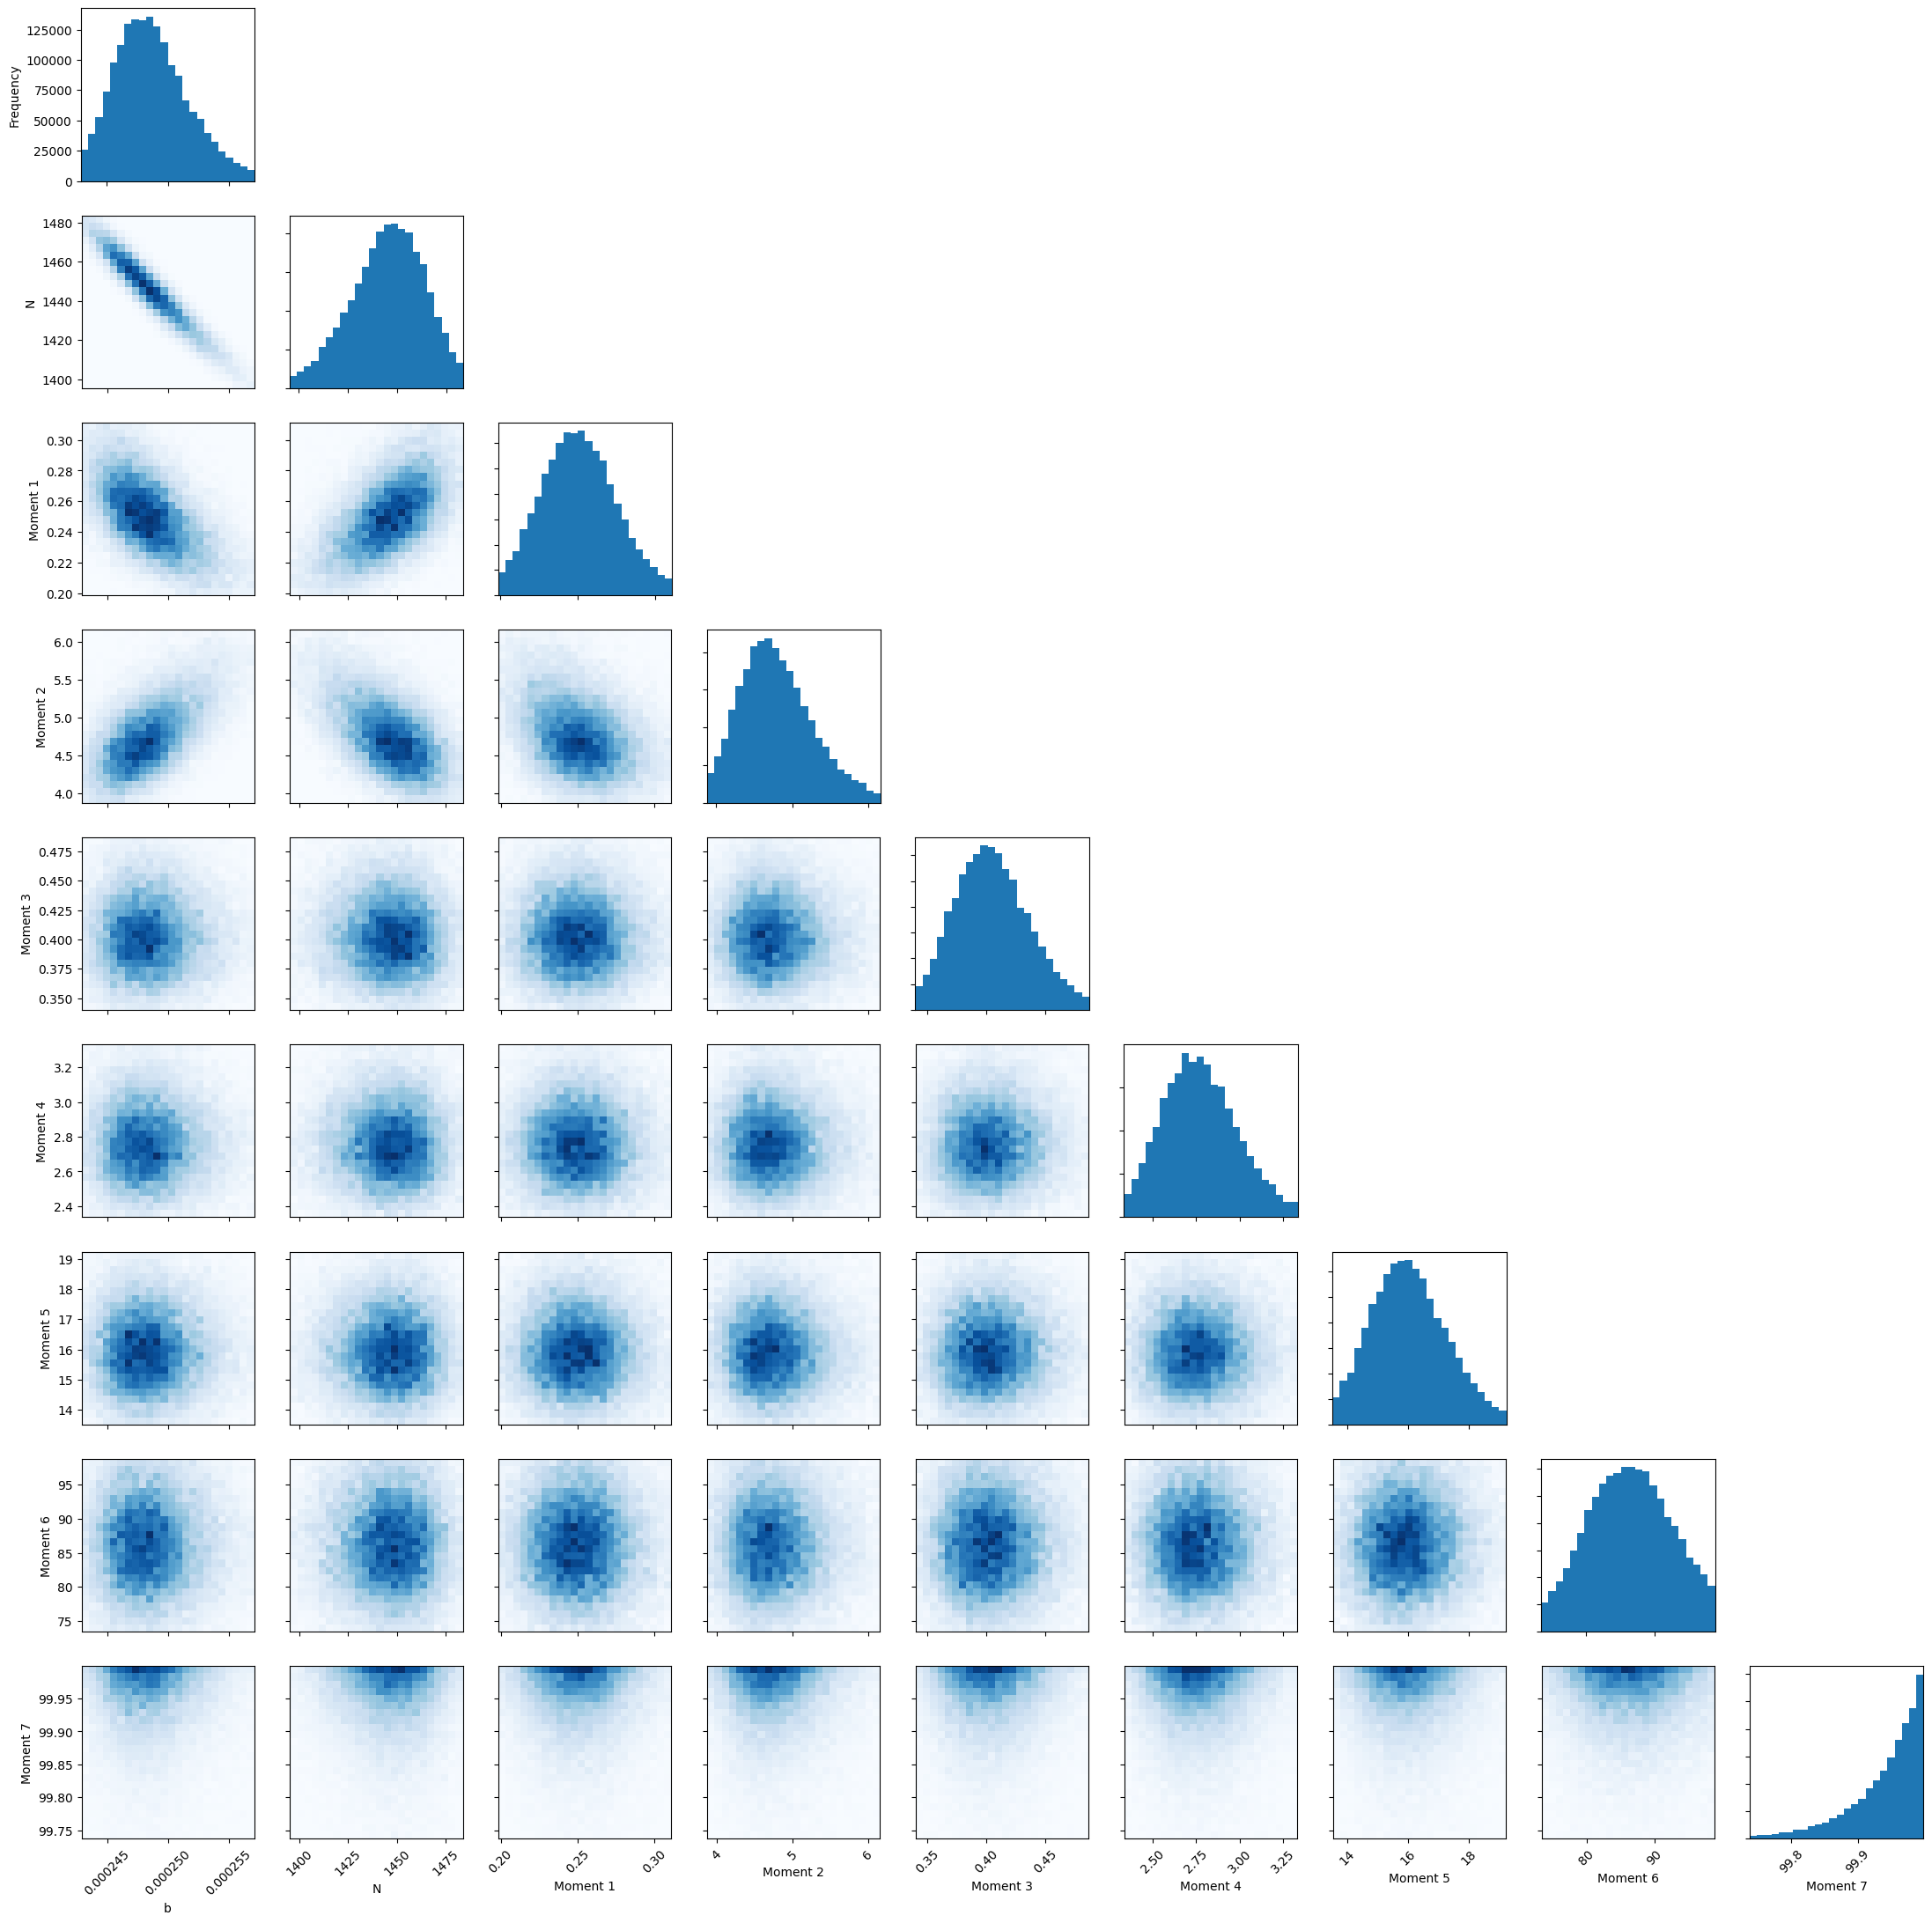

In [20]:
parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5", "Moment 6", "Moment 7"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)

pints.plot.pairwise(AllChains, heatmap=True, 
                    parameter_names=["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5", "Moment 6", "Moment 7"],
                    n_percentiles=97)
                    
plt.show()

[2.47558610e-04 1.44417753e+03 2.37583278e-01 4.10675170e+00
 4.39650075e-01 2.69960290e+00 1.62298992e+01 8.38895786e+01
 9.99412589e+01]


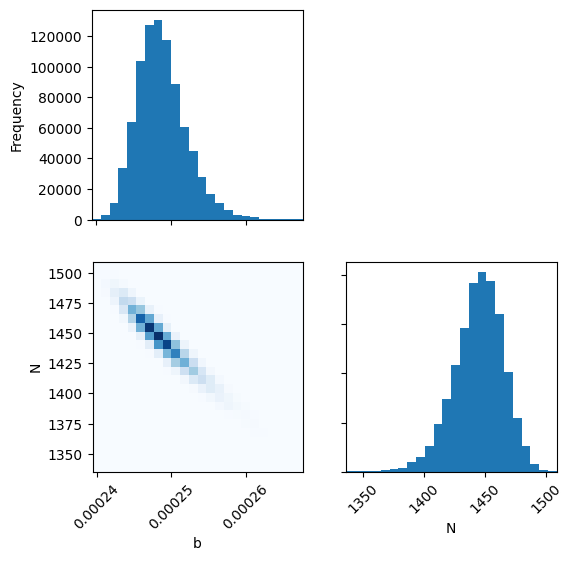

In [21]:
parameter_names = ["b","N"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)
print(AllChains[0])
pints.plot.pairwise(AllChains[:,[0,1]], heatmap=True, 
                    parameter_names=["b","N"])
plt.savefig("Pints_pairwise.png", dpi =300)
plt.show()


In [22]:
parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5", "Moment 6", "Moment 7"]
results = pints.MCMCSummary(chains=chains[:,int(ITERS/2):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)


<class 'pints._mcmc._summary.MCMCSummary'>
param     mean     std.    2.5%     25%      50%      75%      97.5%    rhat    ess      ess per sec.
--------  -------  ------  -------  -------  -------  -------  -------  ------  -------  --------------
b         0.00     0.00    0.00     0.00     0.00     0.00     0.00     1.00    538.86   0.04
N         1444.23  20.68   1397.95  1431.63  1445.90  1458.78  1480.57  1.00    565.66   0.04
Moment 1  0.25     0.03    0.20     0.23     0.25     0.27     0.30     1.00    1217.18  0.09
Moment 2  4.82     0.53    3.95     4.46     4.76     5.12     6.02     1.00    925.07   0.07
Moment 3  0.41     0.03    0.35     0.38     0.40     0.43     0.48     1.00    4818.43  0.34
Moment 4  2.78     0.23    2.37     2.62     2.76     2.92     3.28     1.00    4845.77  0.34
Moment 5  16.05    1.32    13.73    15.12    15.96    16.88    18.88    1.00    4773.80  0.34
Moment 6  86.43    6.19    74.50    82.02    86.41    90.90    98.11    1.00    4515.31  0.32

In [23]:
from tabulate import tabulate
class MyMCMCSummary(pints.MCMCSummary):
    def __str__(self):
        """
        Prints posterior summaries for all parameters to the console, including
        the parameter name, posterior mean, posterior std deviation, the
        2.5%, 25%, 50%, 75% and 97.5% posterior quantiles, rhat, effective
        sample size (ess) and ess per second of run time.
        """
        if self._summary_str is None:
            headers = [
                'param', 'mean', 'std.',
                '2.5%', '25%', '50%', '75%', '97.5%',
                'rhat', 'ess']
            if self._time is not None:
                headers.append('ess per sec.')

            self._summary_str = tabulate(
                self._summary_list,
                headers=headers,
                numalign='left',
                floatfmt='.3g',
            )

        return self._summary_str
    


In [24]:

parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5", "Moment 6", "Moment 7"]
results = MyMCMCSummary(chains=chains[:,int(ITERS/2):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)

<class '__main__.MyMCMCSummary'>
param     mean      std.      2.5%      25%       50%       75%       97.5%     rhat    ess       ess per sec.
--------  --------  --------  --------  --------  --------  --------  --------  ------  --------  --------------
b         0.000249  3.36e-06  0.000243  0.000246  0.000248  0.000251  0.000257  1       539       0.0382
N         1.44e+03  20.7      1.4e+03   1.43e+03  1.45e+03  1.46e+03  1.48e+03  1       566       0.0401
Moment 1  0.251     0.0261    0.202     0.233     0.25      0.268     0.305     1       1.22e+03  0.0862
Moment 2  4.82      0.531     3.95      4.46      4.76      5.12      6.02      1       925       0.0655
Moment 3  0.405     0.0334    0.347     0.382     0.403     0.426     0.478     1       4.82e+03  0.341
Moment 4  2.78      0.228     2.37      2.62      2.76      2.92      3.28      1       4.85e+03  0.343
Moment 5  16        1.32      13.7      15.1      16        16.9      18.9      1       4.77e+03  0.338
Moment 6  8

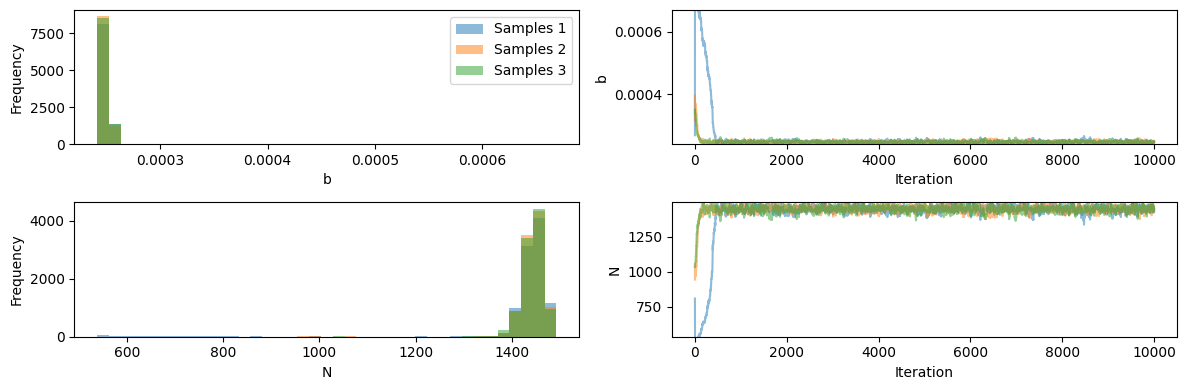

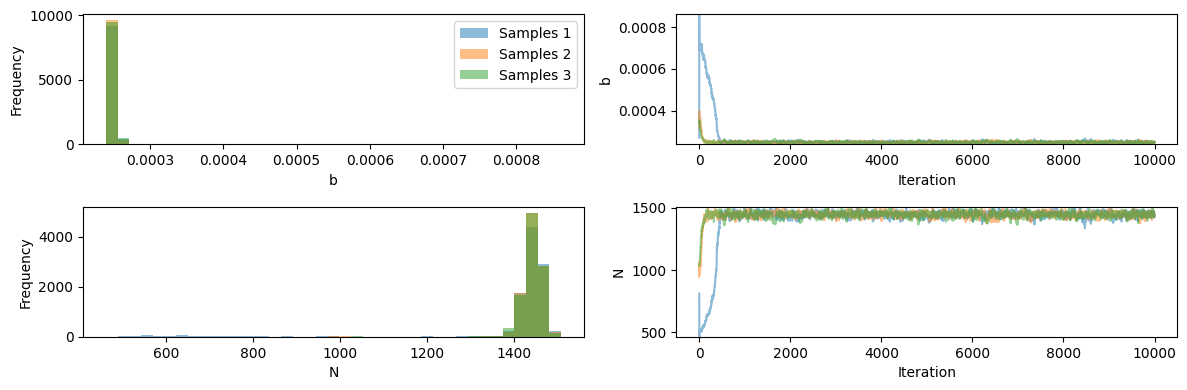

In [25]:
pints.plot.trace(chains[:,:,[0,1]], n_percentiles=99.5, parameter_names=["b","N"])
plt.savefig("pints_out_extremes_removed.png", dpi=300)
plt.show()
pints.plot.trace(chains[:,:,[0,1]], parameter_names=["b","N"])
plt.savefig("pints_out.png", dpi=300)
plt.show()